### Notebook d'exploration et de modélisation à partir de datasets issus de l'INRAE (UMR Agronomie). Analyse de différentes cultures de plantes, zones agricoles, modes de culture. Modélisation de rendements agricoles en fonction d'émission de gaz à effet de serre et d'utilisation de certains intrants (fertilisants azotés).

### Analyse univariée  
- Présentation des jeux de données
- Modes de conduite des cultures
- Zones agricoles
### Analyse de l'utilisation des intrants (de l'azote particulièrement)
- Différents types de culture  
- Utilisation de l'azote par type de culture  
- Utilisation des intrants vs. Rendement par zone et culture  
### Analyse de l'émission de gaz à effets de serre
- Émissions de gaz à effet de serre par zone
- Émissions de gaz à effet de serre moyennes par zone et culture
### Modélisation prédictive des rendements des cultures
- Jointure des datasets
- Choix du modèle
- Visualisation du scatterplot
- Distribution des résidus
- Feature importance
### Traitement du langage naturel
- Dataset des opérations de chantier
- Nettoyage des descriptions
- Nuage de mots

## Analyse univariée

### Présentation des jeux de données

**Les datasets utilisés pour cette analyse exploratoire sont issus du dépôt de l'UMR Agronomie (INRAE)**  
  
**Article**: Référentiel de performances économiques, environnementales et sociales de pratiques culturales économes en intrants  
**Auteurs**:, Simon Buresi, Chantal Loyce, Rémy Ballot  
**Subsidiary Authors**: Agence nationale de la recherche  
**Date de publication**: Période de publication : 2022-01-01 à 2024-07-31  
**Édition**: V1  
**Mots-clés**: produit phytosanitaire, engrais azoté, conduite de la culture, rotation des cultures, analyse multicritère  
**Langue**: Anglais  
**Éditeur**: Recherche Data Gouv  
**DOI**: [https://doi.org/10.57745/LCA116](https://doi.org/10.57745/LCA116)  

On va s'intéresser dans un premier temps à 2 datasets en particulier: 
- Le fichier « 1_crop_management_routes.csv » contient une description quantitative des
itinéraires techniques types retenus par culture, zone, type de succession et stratégie culturale.  
- Le fichier « 5_indicators_values.csv » contient les résultats de l'évaluation multicritère des
itinéraires techniques types présentés dans le fichier 1_crop_management_routes.csv :

In [107]:
import pandas as pd

file_paths = {
    'crop_management_routes': '1_crop_management_routes.csv',
    'crop_parameters': '2_crop_parameters.csv',
    'input_parameters': '3_input_parameters.csv',
    'operation_parameters': '4_operation_parameters.csv',
    'indicators_values': '5_indicators_values.csv'
}

# on charge les fichiers CSV avec gestion des erreurs de délimiteur et d'encodage
def load_data(file_path, delimiter=';', encoding='ISO-8859-1'):
    return pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)

crop_management_routes = load_data(file_paths['crop_management_routes'])
indicators_values = load_data(file_paths['indicators_values'])


In [6]:
print("Taille du fichier crop_management_routes: " + str(crop_management_routes.shape))
print("Taille du fichier indicators_values: " + str(indicators_values.shape))

Taille du fichier crop_management_routes: (496, 49)
Taille du fichier indicators_values: (499, 34)


#### Dataset crop_management_routes

La librairie missingno va nous permettre de visualiser à la fois le nom des colonnes et les valeurs manquantes.

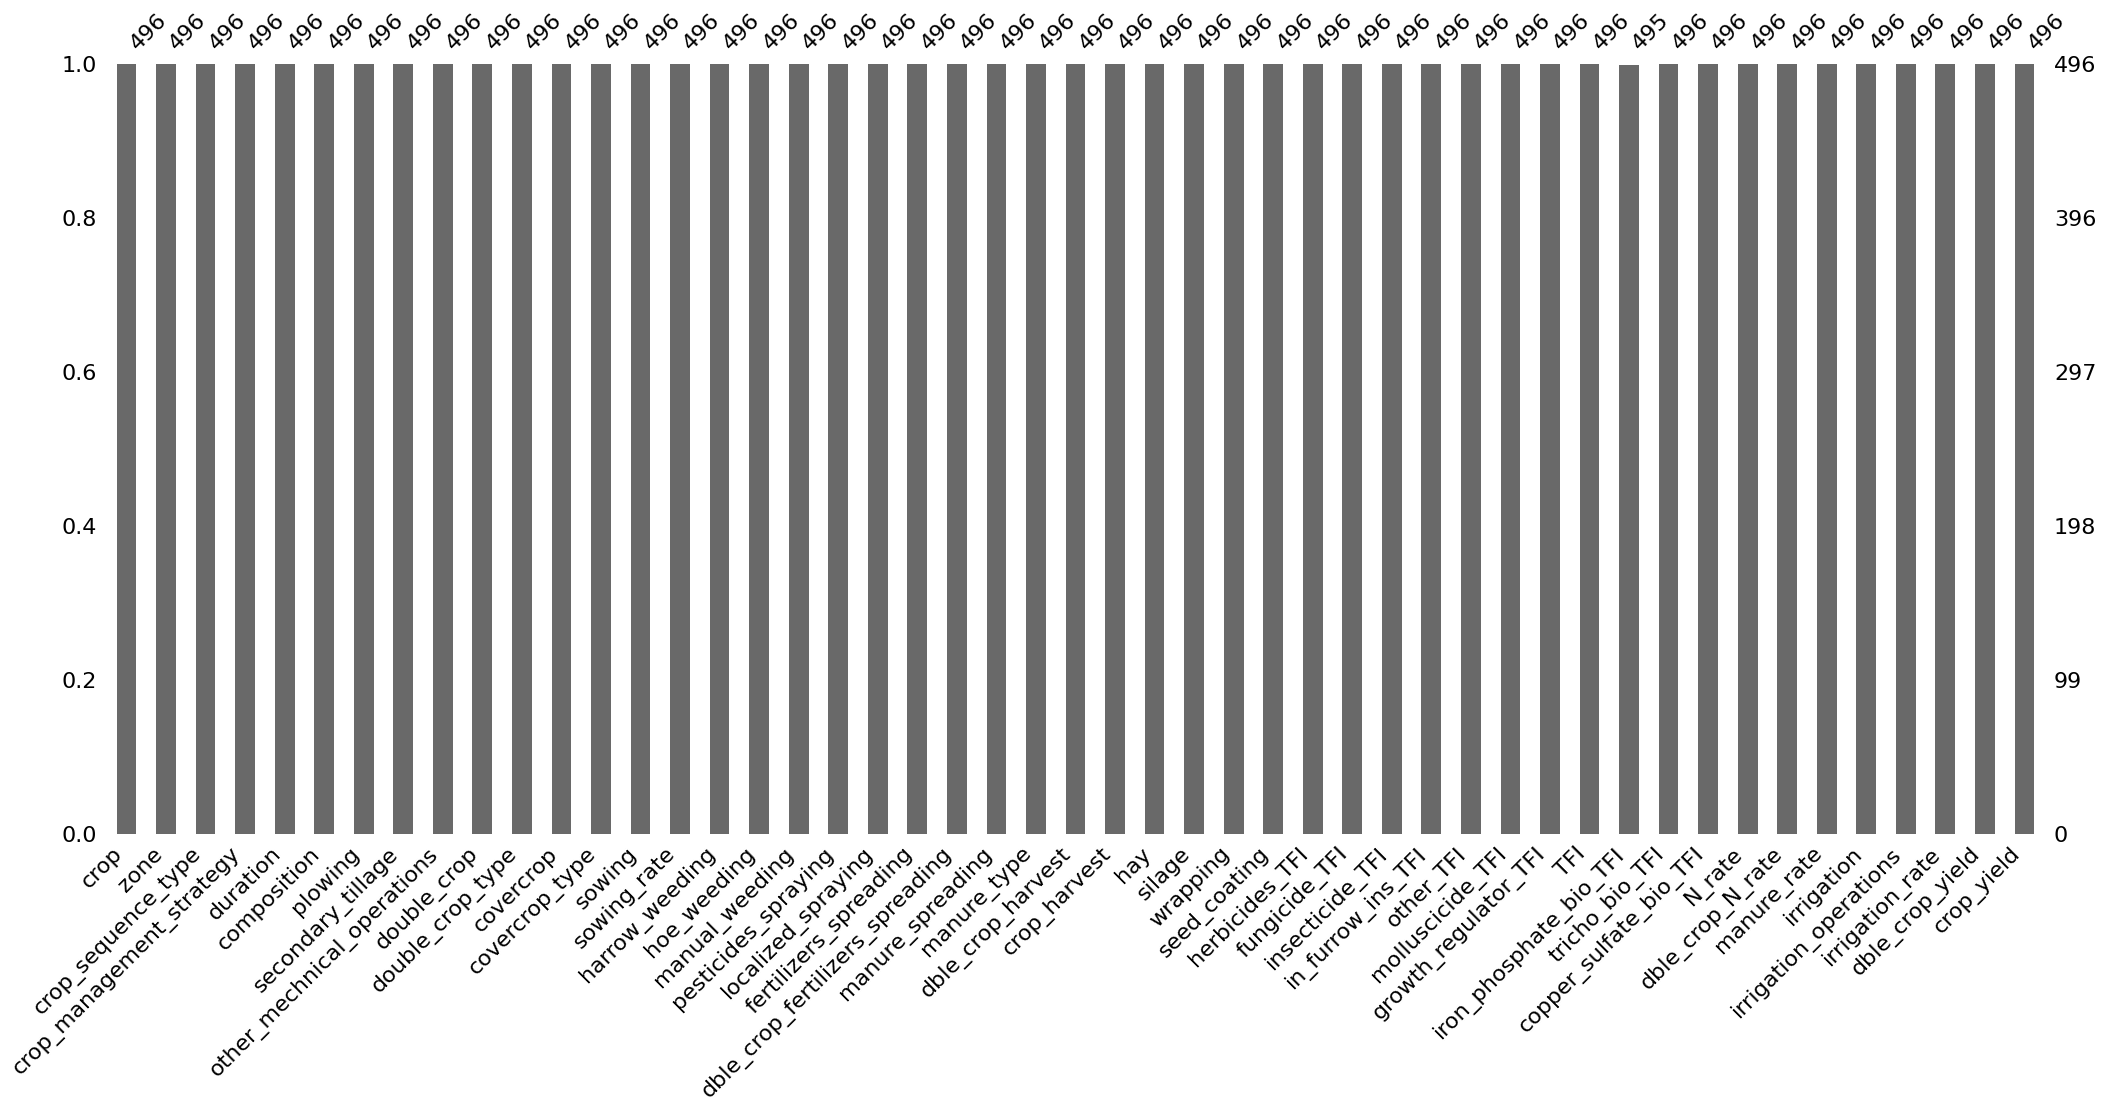

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(crop_management_routes)
plt.show()


Le dataset est complet. Voici quelques explications pour certaines colonnes qui le composent:

- crop:  Culture considérée
- zone:  Zone considérée
- crop_sequence_type:  Type de succession de cultures considéré
- crop_management_strategy:  Mode de conduit considéré
- composition:  Nombre d’espèces composant la culture (1 pour la plupart des cultures, sauf les prairies temporaires et les associations céréales-légumineuses)
- N_rate:  Dose d’azote moyenne (unités)
- irrigation_rate:  Quantité d’irrigation moyenne (mm)
- crop_yield: Rendement moyen de la culture (t/ha)


Statistiques descriptives pour la gestion des cultures:

In [ ]:
print(crop_management_routes.describe())

       sowing  copper_sulfate_bio_TFI      N_rate  dble_crop_N_rate  \
count   496.0              496.000000  496.000000        496.000000   
mean      1.0                0.002016   89.506048          9.294355   
std       0.0                0.044901   60.835994         23.632413   
min       1.0                0.000000    0.000000          0.000000   
25%       1.0                0.000000   30.000000          0.000000   
50%       1.0                0.000000  102.500000          0.000000   
75%       1.0                0.000000  141.250000          0.000000   
max       1.0                1.000000  220.000000         80.000000   

       irrigation_rate  dble_crop_yield  
count       496.000000       496.000000  
mean         25.725806         0.631048  
std          54.633558         1.569586  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           0.000000         0.000000  
max         225.000000  

#### Dataset indicators_values

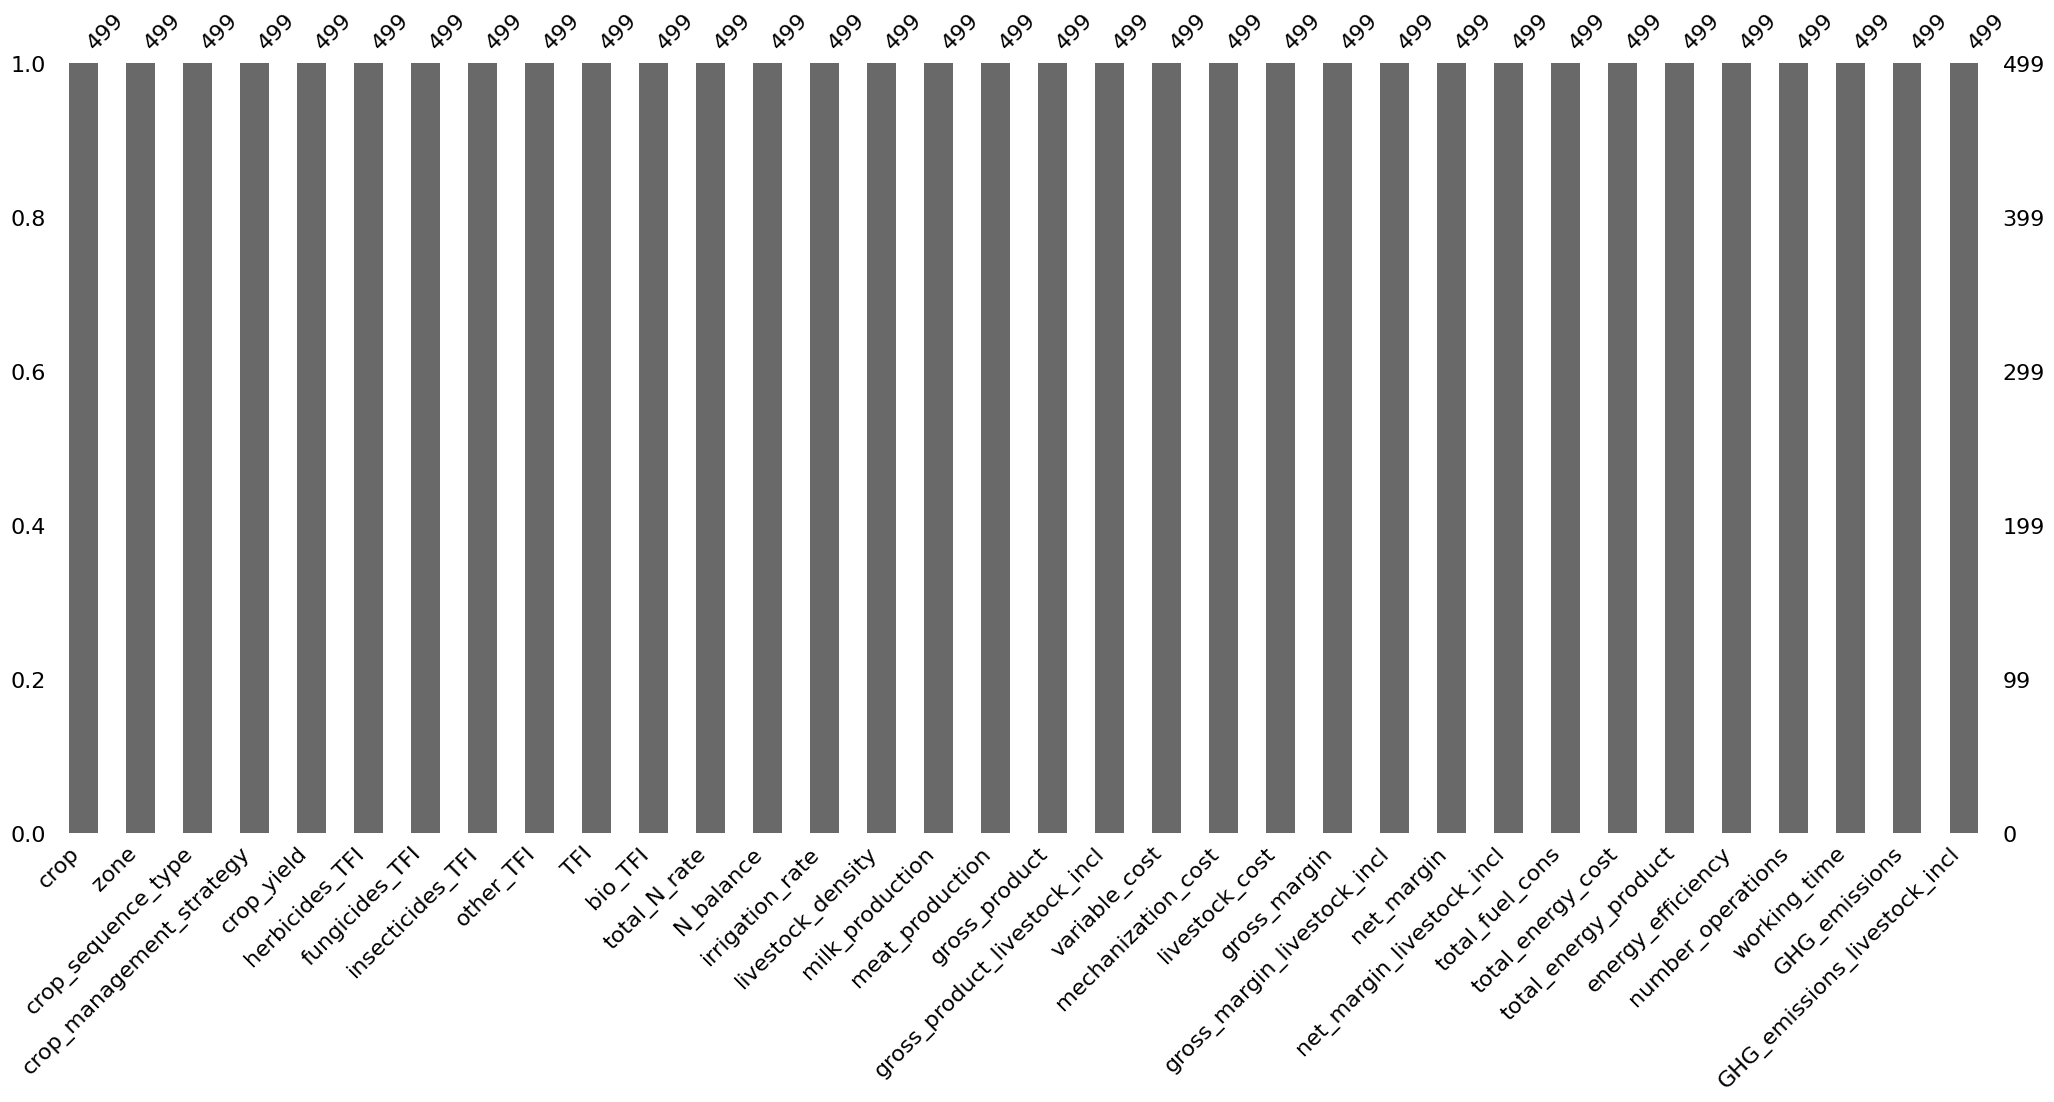

In [8]:
msno.bar(indicators_values)
plt.show()

Le dataset est complet. Voici quelques explications pour certaines colonnes qui le composent:

- crop:  Culture considérée
- zone:  Zone considérée
- crop_sequence_type:  Type de succession de cultures considérée
- crop_management_strategy:  Mode de conduit considéré
- crop_yield:  Rendement de la culture (t/ha) comme définis dans 1_crop_management_routes.csv
- herbicides_TFI:  IFT herbicides comme définis dans 1_crop_management_routes.csv
- fungicides_TFI:  IFT fongicides comme définis dans 1_crop_management_routes.csv
- insecticides_TFI:  IFT insecticides comme définis dans 1_crop_management_routes.csv
- GHG_emissions:  Émissions de gaz à effet de serre (t eq CO2 /ha), due à laconsommation de carburant, au coût énergétique lié à la production de fertilisants et à l’irrigation, sur la base des facteurs d’émission donnés dans 3_input_parameters.csv:
𝐺𝐻𝐺_𝑒𝑚𝑖𝑠𝑠𝑖𝑜𝑛𝑠
= 𝑡𝑜𝑡𝑎𝑙_𝑓𝑢𝑒𝑙_𝑐𝑜𝑛𝑠. 𝑒𝑚𝑖𝑠𝑠𝑖𝑜𝑛_𝑐𝑜𝑒𝑓+ 𝑖𝑟𝑟𝑖𝑔𝑎𝑡𝑖𝑜𝑛_𝑟𝑎𝑡𝑒. 𝑒𝑚𝑖𝑠𝑠𝑖𝑜𝑛_𝑐𝑜𝑒𝑓+ 𝑡𝑜𝑡𝑎𝑙_𝑁_𝑟𝑎𝑡𝑒. 𝑒𝑚𝑖𝑠𝑠𝑖𝑜𝑛_𝑐𝑜𝑒𝑓

In [ ]:
print(indicators_values.sample(3))

              crop                             zone  \
238  maïs fourrage            corn_cultivation_zone   
407  maïs fourrage  northern_high_potentiality_zone   
439        luzerne  northern_high_potentiality_zone   

                          crop_sequence_type crop_management_strategy  \
238                  crop_sequence_with_corn                      N2a   
407  crop_sequence_organic_livestock_farming                       N3   
439        crop_sequence_organic_field_crops                       N3   

     crop_yield herbicides_TFI fungicides_TFI insecticides_TFI other_TFI  TFI  \
238        14.5            1,1            0,0              0,2       0,0  1,3   
407        12.0            0,0            0,0              0,0       0,0  0,0   
439        10.0            0,0            0,0              0,0       0,0  0,0   

     ... net_margin  net_margin_livestock_incl  total_fuel_cons  \
238  ...        580                        602              160   
407  ...        763        

### Modes de conduite des cultures

crop_management_strategy représente les modes de conduite des cultures, selon leur dépendance à l’usage d’intrants de synthèse (fertilisants azotés et produits phytosanitaires). Les 5 modes de cultures sont : 
- N0:  Mode de conduit base sur le recours systématique aux intrants de synthèse.
- N1: Mode de conduit base sur un usage efficient des intrants de synthèse, en s’appuyant
sur des observations au champs et l’utilisation d’outils d’aide à la décision.
- N2a: Mode de conduit base sur les principes de la protection intégrée, qui inclue la
substitution par des méthode de lutte non-chimique (par exemple, le désherbage
mécanique) ou la reconception des itinéraires technique pour prévenir les dégâts de
bioagresseurs.
- N2c:  Mode de conduit base sur les principes de l’agroécologie, qui inclue la
diversification des systèmes de culture pour favoriser les régulations naturelles.
- N3: Mode de conduit base sur le cahier des charges de l’agriculture biologique, qui
exclut l’usage d’intrants de synthèse.

In [7]:
crop_management_routes['crop_management_strategy'].unique()

array(['Average conventionnal', 'N0', 'N2a', 'N2a bis', 'N2c ', 'N3',
       'N2a ', 'N1', 'N2c', 'Average conventionnal '], dtype=object)

On a des espaces en trop pour certaines valeurs ('N2a' et 'N2a ' par exemple). On va réaliser une homogénéisation de toutes ces valeurs grâce à la méthode str.strip() qui va retirer les espaces en début et fin de toutes les chaînes.

In [9]:
crop_management_routes['crop_management_strategy'] = crop_management_routes['crop_management_strategy'].str.strip()
crop_management_routes['crop_management_strategy'].unique()

array(['Average conventionnal', 'N0', 'N2a', 'N2a bis', 'N2c', 'N3', 'N1'],
      dtype=object)

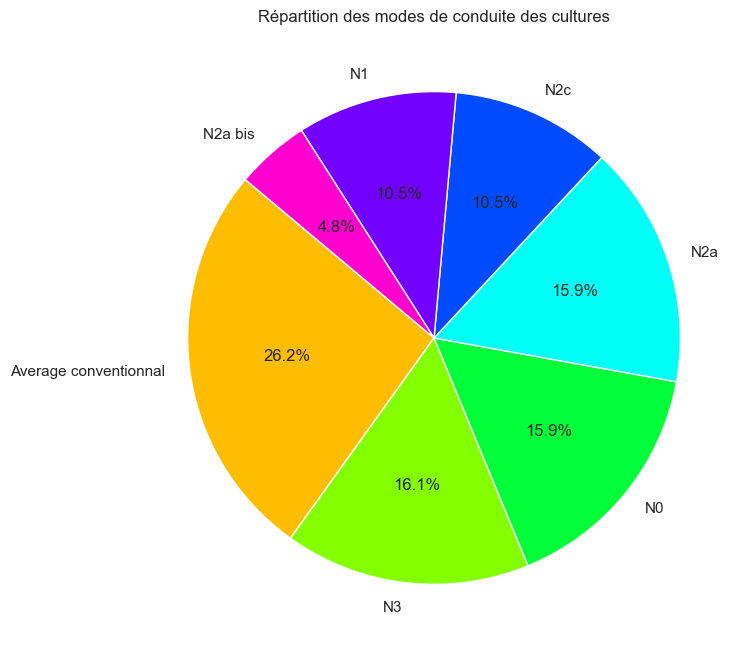

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Fonction pour créer un pie chart
def create_pie_chart(data, column, title):
    proportions = data[column].value_counts(normalize=True)
    
    palette = sns.color_palette("hsv", len(proportions))

    plt.figure(figsize=(8, 8))
    plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140, colors=palette)
    plt.title(title)
    plt.show()

create_pie_chart(crop_management_routes, 'crop_management_strategy', 'Répartition des modes de conduite des cultures')

### Zones agricoles

In [14]:
crop_management_routes['zone'].unique()

array(['sheep_farming_zone', 'western_massif_central_zone',
       'mediterranean_region', 'eastern_massif_central_zone',
       'mountain_dairy_farming_zone', 'corn_cultivation_zone',
       'western_dairy_farming_zone',
       'intermediate_limestone_plateaux_zone',
       'northern_high_potentiality_zone', 'paris_basin_zone'],
      dtype=object)

On distingue 10 régions de culture différentes dans le dataset. Les voici représentées sur une carte de France. À noter que la Corse ne figure pas dans le jeu de données.

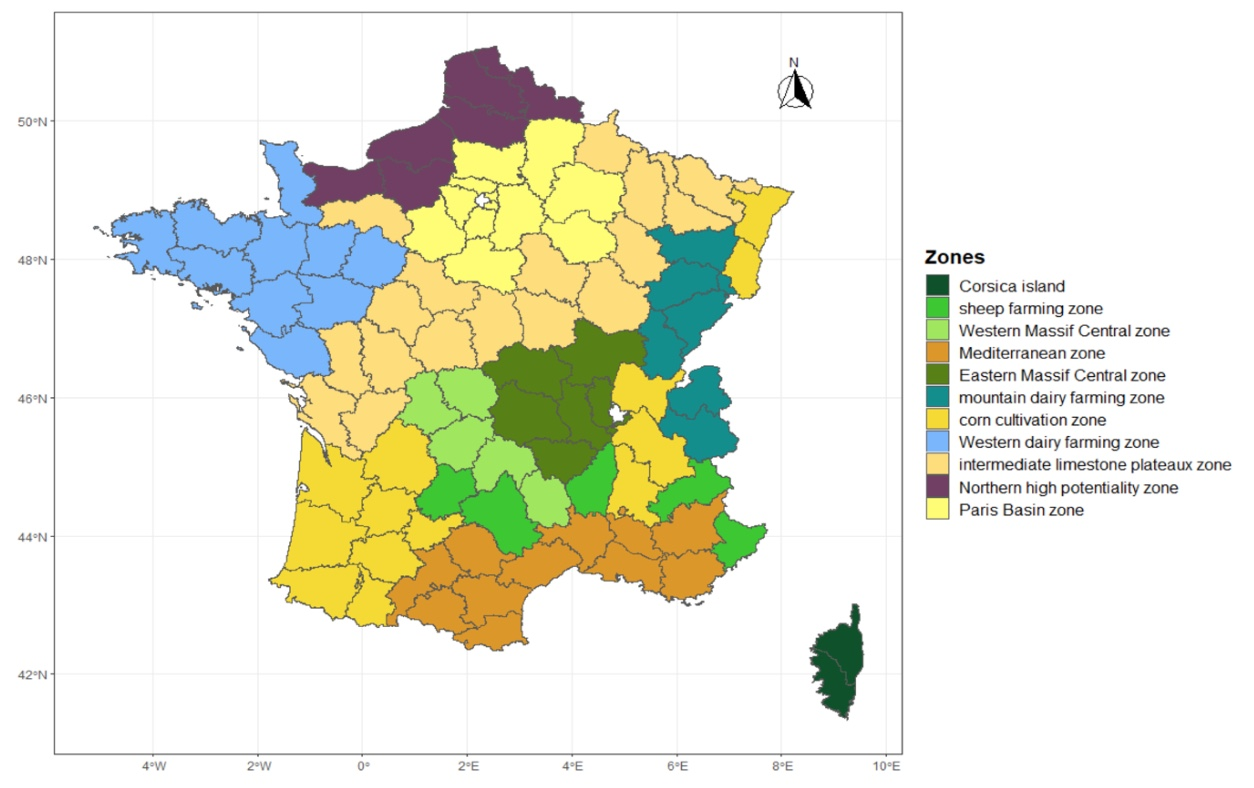

In [67]:
from IPython.display import display, Image

display(Image(filename='cultures-france.jpg'))



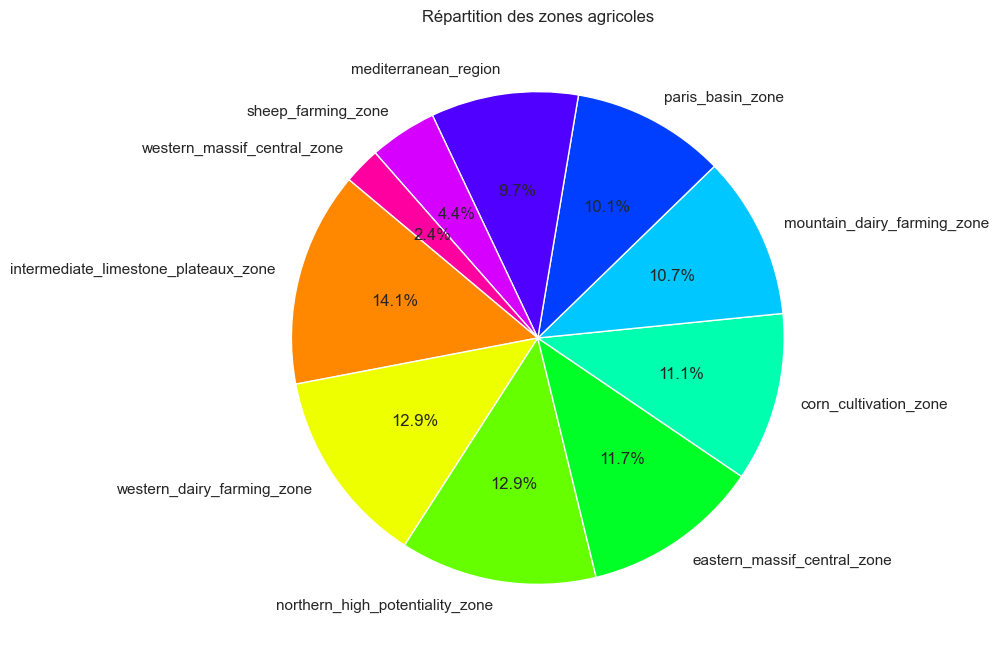

In [15]:
create_pie_chart(crop_management_routes, 'zone', 'Répartition des zones agricoles')

## Analyse de l'utilisation des intrants (de l'azote particulièrement)

### Différents types de culture

In [20]:
crop_management_routes['crop'].unique()

array(['silage_corn', 'winter_barley', 'triticale', 'temporary_grassland',
       'alfalfa', 'pulse_cereal_intercrop', 'durum_wheat', 'sunflower',
       'soft_wheat', 'grain_corn', 'oilseed_rape', 'sorghum', 'chickpea',
       'soybean', 'winter_oilseed_flax', 'winter_protein_pea', 'lentil',
       'spring_barley', 'winter_fababean', 'potatoes',
       'spring_protein_pea', 'spring_fababean', 'buckwheat',
       'spring_oilseed_flax', 'sugar_beet', 'fiber_flax', 'hemp'],
      dtype=object)

In [21]:
crop_management_routes['crop'].nunique()

27

Il y a 27 cultures différentes dans le dataset dont les noms sont en anglais. On les remplace par leur traduction française.

In [ ]:
# Dictionnaire de traduction
translations = {
    'silage_corn': 'maïs fourrage',
    'winter_barley': 'orge d’hiver',
    'triticale': 'triticale',
    'temporary_grassland': 'prairie temporaire',
    'alfalfa': 'luzerne',
    'pulse_cereal_intercrop': 'association céréale-légumineuse',
    'durum_wheat': 'blé dur',
    'sunflower': 'tournesol',
    'soft_wheat': 'blé tendre',
    'grain_corn': 'maïs grain',
    'oilseed_rape': 'colza',
    'sorghum': 'sorgho',
    'chickpea': 'pois chiche',
    'soybean': 'soja',
    'winter_oilseed_flax': 'lin oléagineux',
    'winter_protein_pea': 'pois protéagineux d’hiver',
    'lentil': 'lentille',
    'spring_barley': 'orge de printemps',
    'winter_fababean': 'féverole d’hiver',
    'potatoes': 'pommes de terre',
    'spring_protein_pea': 'pois protéagineux de printemps',
    'spring_fababean': 'féverole de printemps',
    'buckwheat': 'sarrasin',
    'spring_oilseed_flax': 'lin oléagineux de printemps',
    'sugar_beet': 'betterave sucrière',
    'fiber_flax': 'lin fibre',
    'hemp': 'chanvre'
}

# Appliquer la traduction
crop_management_routes['crop'] = crop_management_routes['crop'].replace(translations)


In [25]:
crop_management_routes['crop'].unique()

array(['maïs fourrage', 'orge d’hiver', 'triticale', 'prairie temporaire',
       'luzerne', 'association céréale-légumineuse', 'blé dur',
       'tournesol', 'blé tendre', 'maïs grain', 'colza', 'sorgho',
       'pois chiche', 'soja', 'lin oléagineux',
       'pois protéagineux d’hiver', 'lentille', 'orge de printemps',
       'féverole d’hiver', 'pommes de terre',
       'pois protéagineux de printemps', 'féverole de printemps',
       'sarrasin', 'lin oléagineux de printemps', 'betterave sucrière',
       'lin fibre', 'chanvre'], dtype=object)

### Utilisation de l'azote par type de culture

/var/folders/yf/ybh7bvds1pj_2v6ybjpf0jvw0000gn/T/ipykernel_944/3124205660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='crop', y='N_rate', data=crop_management_routes, palette=palette)
/var/folders/yf/ybh7bvds1pj_2v6ybjpf0jvw0000gn/T/ipykernel_944/3124205660.py:7: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='crop', y='N_rate', data=crop_management_routes, palette=palette)


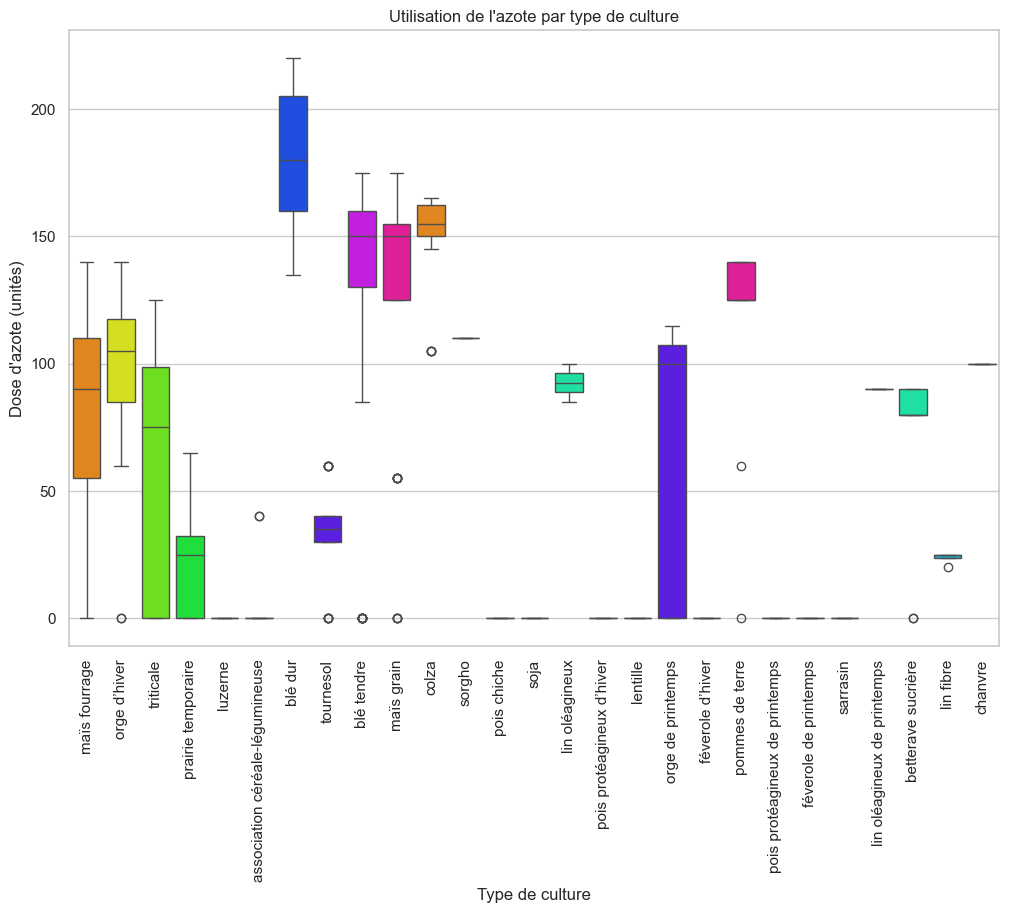

In [28]:
sns.set(style="whitegrid")

# Palette de couleurs pour les graphiques
palette = sns.color_palette("hsv", n_colors=10) 
# Boxplot de l'utilisation des intrants (azote) par type de culture
plt.figure(figsize=(12, 8))
sns.boxplot(x='crop', y='N_rate', data=crop_management_routes, palette=palette)
plt.title('Utilisation de l\'azote par type de culture')
plt.xlabel('Type de culture')
plt.xticks(rotation=90)  # Rotation à 90 degrés pour les noms en abcisse
plt.ylabel('Dose d\'azote (unités)')
plt.show()


L'utilisation la plus massive d'azote se fait avec la culture du blé dur (jusqu'à 200 unités). Viennent ensuite dans un même ordre de grandeur le blé tendre, le maïs grain et le colza (environ 150 unités). Les triticales et l'orge de printemps sont les plantes qui ont le plus grand écart-type: l'utilisation d'intrant azoté pour ces cultures peut être extrêmement variable quoique moins important que les cultures citées précédemment. Enfin, d'autres plantes ne nécessitent quasiment pas d'azote telles que les pois chiches, le soja ou la luzerne...

### Utilisation des intrants vs. Rendement par zone et culture

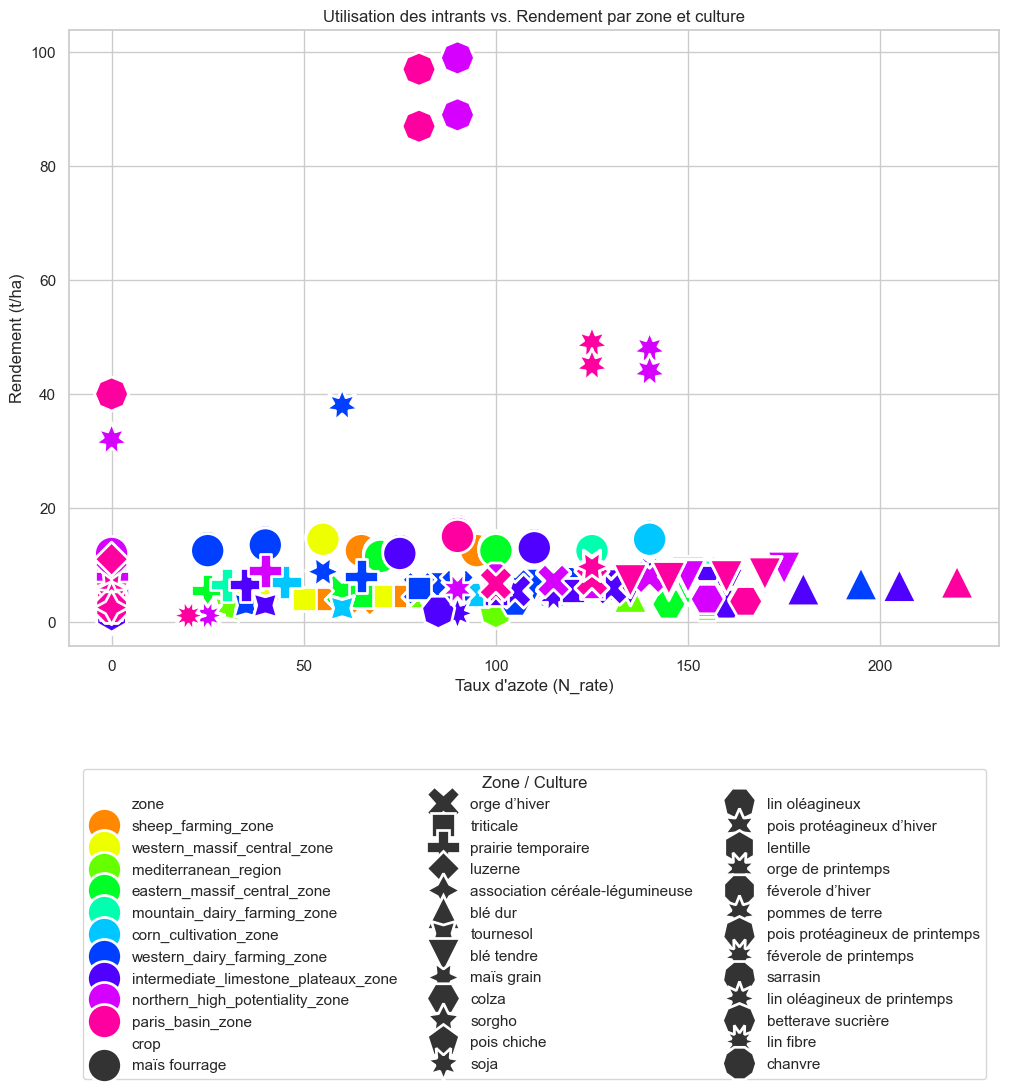

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

crop_management_routes = load_data(file_paths['crop_management_routes'])
crop_management_routes['crop_yield'] = crop_management_routes['crop_yield'].str.replace(',', '.').astype(float)



plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    x='N_rate',
    y='crop_yield',
    hue='zone',
    style='crop',
    data=crop_management_routes,
    palette='hsv',
    s=400  # taille des points
)

plt.title('Utilisation des intrants vs. Rendement par zone et culture')
plt.xlabel('Taux d\'azote (N_rate)')
plt.ylabel('Rendement (t/ha)')

# `bbox_to_anchor` spécifie la position relative à `loc`; (0.5, -0.2) signifie centré et sous le graphique
# `loc` à 'upper center' place le haut de la légende à cet emplacement
# `ncol`: nombre de colonnes légende, ce qui permet de les afficher en une seule ligne si possible
plt.legend(title='Zone / Culture', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, borderaxespad=0.)

plt.grid(True)
plt.show()


Les plus gros rendements sont de loin dûs à la culture de la betterave sucrière que ce soit dans le bassin parisien ou dans toute la zone à haut potentiel du Nord avec des rendements d'à peu près 90 à 100 tonnes par hectare. Vient ensuite la culture de la pomme de terre avec des rendements de 40 à 50 tonnes par hectare dans ces 2 même régions, et aussi dans une moindre mesure dans la "région d'élevage laitier de l'Ouest".

## Analyse de l'émission de gaz à effets de serre

### Émissions de gaz à effets de serre par zone

In [ ]:
indicators_values['GHG_emissions'].dtypes

dtype('O')

Le dtype 'O' dans pandas signifie que les données dans cette colonne sont traitées comme des objets, ce qui, dans le contexte de pandas, correspond généralement à des chaînes de caractères. Pour considérer les émissions de CO2 comme des nombres, il va falloir convertir ces valeurs en un type numérique approprié (comme float ou int).

/var/folders/yf/ybh7bvds1pj_2v6ybjpf0jvw0000gn/T/ipykernel_944/366654890.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='zone', y='GHG_emissions', data=indicators_values, estimator=sum, ci=None)


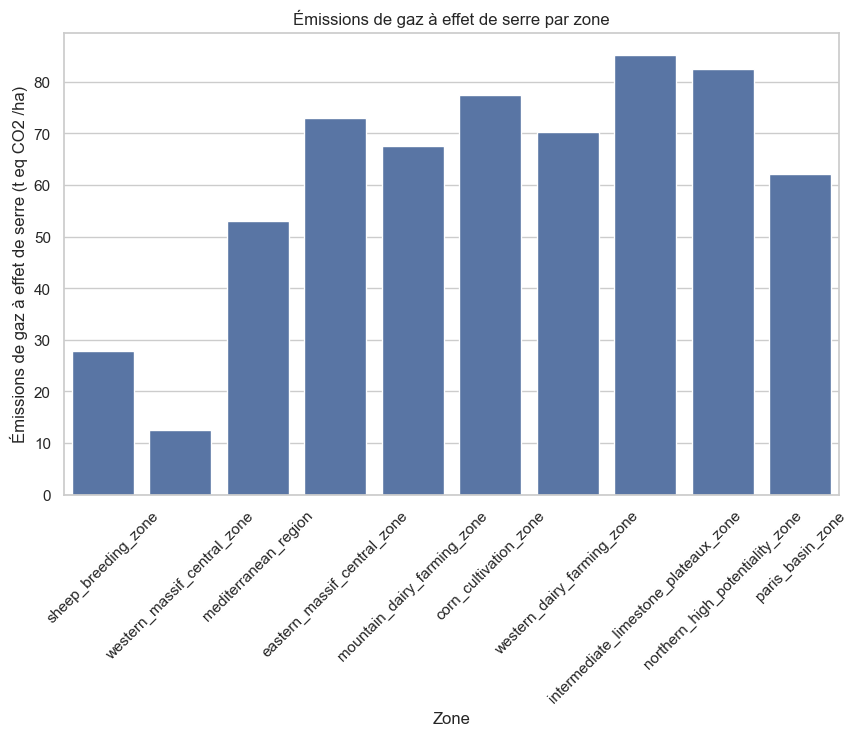

In [45]:
indicators_values = load_data(file_paths['indicators_values'])
# conversion des émissions en float après avoir remplacé les virgules
indicators_values['GHG_emissions'] = indicators_values['GHG_emissions'].str.replace(',', '.').astype(float)

plt.figure(figsize=(10, 6))
sns.barplot(x='zone', y='GHG_emissions', data=indicators_values, estimator=sum, ci=None)
plt.title('Émissions de gaz à effet de serre par zone')
plt.xlabel('Zone')
plt.xticks(rotation=45)
plt.ylabel('Émissions de gaz à effet de serre (t eq CO2 /ha)')
plt.show()


Beaucoup de régions ont des niveaux similaires d'émission de gaz à effet de serre, le niveau le plus important revenant à la "région d'élevage laitier de l'Ouest" suivie de près par la "région des plateaux calcaire" qui est une région centrale traversant la France d'Est en Ouest, une langue de territoire s'étalant des Ardennes jusqu'au Bordelais. 2 régions se démarquent par des émissions de gaz à effet de serre beaucoup plus faibles que les autres: la région d'élevage de moutons (Tarn, Ardèche, Hautes-Alpes...) et plus encore la région se stuant à l'ouest du Massif Central.

### Émissions de gaz à effet de serre moyennes par zone et culture

In [70]:
indicators_values['crop'].unique()

array(['silage_corn', 'winter_barley', 'triticale', 'temporary_grassland',
       'alfalfa', 'pulse_cereal_intercrop', 'durum_wheat', 'sunflower',
       'soft_wheat', 'grain_corn', 'oilseed_rape', 'sorghum', 'chickpea',
       'soybean', 'winter_oilseed_flax', 'winter_protein_pea', 'lentil',
       'spring_barley', 'winter_fababean', 'potatoes',
       'spring_protein_pea', 'spring_fababean', 'buckwheat',
       'spring_oilseed_flax', 'sugar_beet', 'fiber_flax', 'hemp'],
      dtype=object)

In [71]:
indicators_values['crop'].nunique()

27

Les cultures présentes dans le dataset indicators_values sont les mêmes que celles du dataset crop_management_routes. On procède à la même traduction en français que précédemment.

In [72]:
indicators_values = load_data(file_paths['indicators_values'])
indicators_values['crop'] = indicators_values['crop'].replace(translations)

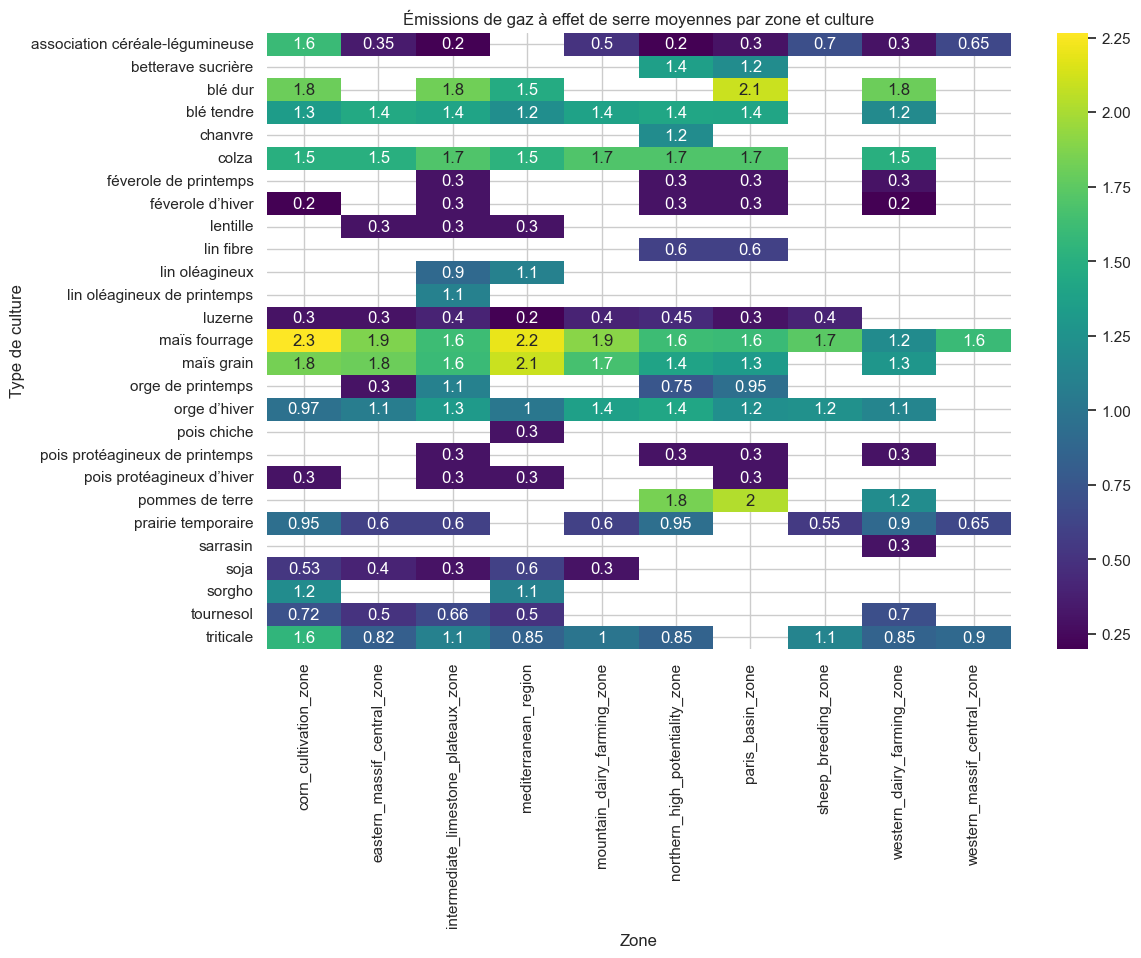

In [ ]:

indicators_values['GHG_emissions'] = indicators_values['GHG_emissions'].str.replace(',', '.').astype(float)

heatmap_data = indicators_values.pivot_table(values='GHG_emissions', index='crop', columns='zone', aggfunc='mean')

if not heatmap_data.isnull().all().all():  # vérifie si toutes les valeurs ne sont pas NaN
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis')
    plt.title('Émissions de gaz à effet de serre moyennes par zone et culture')
    plt.xlabel('Zone')
    plt.ylabel('Type de culture')
    plt.show()
else:
    print("Les données de la heatmap sont toutes NaN.")

La culture la pus dispendieuse en émission de gaz à effets de serre est le maïs fourrage. Il atteint de très hauts niveaux d'émission dans la "Région de culture du maïs" (Aquitaine, Rhône-Alpes, Alsace-Lorraine) mais aussi dans la Région Méditerrannée. De plus, le maïs fourrage est la seule plante cultivée dans toutes les régions. D'une manière générale, le maïs est la plante responsable des plus fortes émissions puisque le maïs grain arrive 2e juste derrière le maïs fourrage avec une présence dans quasiment toutes les régions. Les pommes de terre sont également très émettrices de C02 mais seulement dans 2 régions: le bassin parisien et le Nord. A l'inverse, des plantes ont un impact très faible telles que les féveroles, les lentilles ou les pois protéagineux, que ce soit de printemps ou d'hiver.

## Modélisation prédictive des rendements des cultures

### Jointure des datasets

Pour modéliser nos prédictions de rendements (crop_yield), on va se servir de variables dépendantes telles que l'émission de gaz à effet de serre (GHG_emissions) ou la quantité de fertilisant azoté utilisé (N_rate). Or ces colonnes n'appartiennent pas au même dataset. On va donc procéder à une jointure des 2 jeux de données.  
On va de plus convertir les variables objet crop_yield et GHG_emissions en variables numériques float64.  
La variable N_rate est d'ores et déjà une variable int64.

In [75]:
indicators_values = load_data(file_paths['indicators_values'])
indicators_values['crop'] = indicators_values['crop'].replace(translations)
indicators_values['crop_yield'] = indicators_values['crop_yield'].str.replace(',', '.').astype(float)
indicators_values['GHG_emissions'] = indicators_values['GHG_emissions'].str.replace(',', '.').astype(float)

crop_management_routes = load_data(file_paths['crop_management_routes'])
crop_management_routes['crop'] = crop_management_routes['crop'].replace(translations)
crop_management_routes['crop_yield'] = crop_management_routes['crop_yield'].str.replace(',', '.').astype(float)

combined_data = pd.merge(crop_management_routes, indicators_values, on=['zone', 'crop'])

print(combined_data['N_rate'].dtypes)
print(combined_data['GHG_emissions'].dtypes)
print(combined_data['crop_yield_x'].dtypes)
print(combined_data['crop_yield_y'].dtypes)
print(combined_data['crop'].dtypes)
print(combined_data['zone'].dtypes)
print(combined_data.shape)

int64
float64
float64
float64
object
object
(3276, 81)


In [89]:
combined_data[['crop_yield_y', 'crop_yield_x']].sample(10)

,crop_yield_y,crop_yield_x
1975,6.9,6.3
3160,5.8,6.4
2304,3.0,2.9
857,7.0,6.9
2295,2.9,3.0
3249,49.0,49.0
369,6.4,5.8
1805,13.0,13.5
920,6.3,6.3
1506,6.7,7.5


Les rendements provenant des 2 datasets ne sont pas toujours tout à fait les mêmes. On calcule le nombre de lignes où ils sont similaires.

In [ ]:
equal_rows = (combined_data['crop_yield_x'] == combined_data['crop_yield_y'])
number_of_equal_rows = equal_rows.sum()
print("Nombre de lignes avec des valeurs égales:", number_of_equal_rows)

Nombre de lignes avec des valeurs égales: 917


917 lignes ont des rendements similaires provenant des jeux de données crop_management_routes et indicators_values. Ce sont ces lignes unquement que l'on conserve pour procéder à la modélisation.

In [88]:
data = combined_data[equal_rows]
data.shape

(917, 81)

### Choix du modèle: RandomForestRegressor

Un modèle de régression basé sur un RandomForestRegressor est utilisé. Ce choix est dû à la capacité de la forêt aléatoire à modéliser des relations complexes sans configuration extensive des hyperparamètres et à sa robustesse face au surajustement. Pour la modélisation, les étapes suivantes sont réalisées: 

1. Préparation des données

    - Suppression des lignes manquantes : Les lignes où la valeur de la cible 'crop_yield_x' est manquante sont supprimées pour assurer l'intégrité des données utilisées pour l'entraînement et l'évaluation du modèle.
    - Sélection des features : Les colonnes sélectionnées comme caractéristiques pour le modèle incluent 'crop' (type de culture), 'zone' (zone géographique), 'N_rate' (taux d'azote utilisé), et 'GHG_emissions' (émissions de gaz à effet de serre). Ces caractéristiques sont choisies pour leur potentiel impact ou corrélation avec les rendements des cultures.

2. Prétraitement des données

    - Normalisation des données numériques : Les données numériques ('N_rate' et 'GHG_emissions') sont normalisées à l'aide de StandardScaler pour garantir que le modèle n'est pas biaisé par l'échelle des valeurs.
    - Encodage des variables catégorielles : Les variables catégorielles ('crop' et 'zone') sont transformées en utilisant OneHotEncoder. Cela convertit les catégories en vecteurs de 0 et de 1, permettant au modèle de mieux interpréter et utiliser ces données.

3. Création et configuration du pipeline

    - Pipeline : Un pipeline est créé pour enchaîner le prétraitement et le modèle de régression. Cela facilite l'exécution du workflow complet de prétraitement et de modélisation, assurant que toutes les étapes sont appliquées de manière cohérente lors de différentes phases d'entraînement et de test.
    - Régresseur : Un modèle de régression basé sur un RandomForestRegressor est utilisé. Ce choix est dû à la capacité de la forêt aléatoire à modéliser des relations complexes sans configuration extensive des hyperparamètres et à sa robustesse face au surajustement.

4. Entraînement et évaluation du modèle

    - Séparation des données : Les données sont divisées en un ensemble d'entraînement (70%) et un ensemble de test (30%). Cette répartition permet d'évaluer le modèle sur des données non vues pour vérifier sa généralisation.
    - Entraînement du modèle : Le modèle est entraîné sur l'ensemble d'entraînement.
    - Prédiction et évaluation : Le modèle prédit les rendements sur l'ensemble de test. L'erreur quadratique moyenne (MSE) est calculée pour évaluer la précision des prédictions. Un MSE plus faible indique que les prédictions du modèle sont plus proches des vraies valeurs, signifiant une meilleure performance du modèle.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# suppression des lignes où la cible est manquante
data.dropna(subset=['crop_yield_x'], inplace=True)

# sélection des features
features = ['crop', 'zone', 'N_rate', 'GHG_emissions']
X = data[features]
y = data['crop_yield_x']  # y est déjà un float à cette étape

# prétraitement pour les variables numériques et catégorielles
numeric_features = ['N_rate', 'GHG_emissions']
numeric_transformer = StandardScaler()

categorical_features = ['crop', 'zone']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# pipeline de régression
regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# entraînement du modèle
regressor.fit(X_train, y_train)

# prédiction des valeurs sur l'ensemble de test
y_pred = regressor.predict(X_test)

# évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Le MSE du modèle est : {mse:.2f}")


/var/folders/yf/ybh7bvds1pj_2v6ybjpf0jvw0000gn/T/ipykernel_944/938344775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['crop_yield_x'], inplace=True)


Le MSE du modèle est : 2.51


Le **Mean Squared Error (MSE)**, ou erreur quadratique moyenne en français, est une métrique utilisée pour évaluer la qualité des modèles de régression. Elle mesure la moyenne des carrés des différences entre les valeurs prédites par le modèle et les valeurs réelles observées. Plus il est proche de zéro, mieux c'est, car cela indique que les erreurs entre les prédictions et les valeurs réelles sont petites en moyenne. On obtient ici un MSE de **2.51 tonnes/ha**.  

Calculer le **Root Mean Squared Error (RMSE)**, qui est la racine carrée du MSE, peut offrir une meilleure interprétation, car il ramène l'erreur à l'échelle d'origine des données. On peut ensuite le comparer à l'ordre de grandeur des valeurs cibles ou à leur écart type par exemple.

In [103]:
import numpy as np
rmse = np.sqrt(mse)
rmse

np.float64(1.5828510915108347)

In [ ]:
data['crop_yield_x'].std()

np.float64(14.785612323716933)

**Le RMSE est de 1.58, l'écart type du rendement est de 14,8.**    
Cela suggère que l'erreur du modèle est relativement faible comparée à la variabilité des données. En général, un RMSE bien inférieur à l'écart type est un indicateur d'une bonne performance du modèle.

### Visualisation du scatterplot

Le script Python  suivant va génèrer un graphique pour visualiser la comparaison entre les valeurs réelles des rendements des cultures (issues de l'ensemble de test) et les valeurs prédites par le modèle de régression. Plus les points sont proches de la ligne de régression, plus les prédictions sont justes.

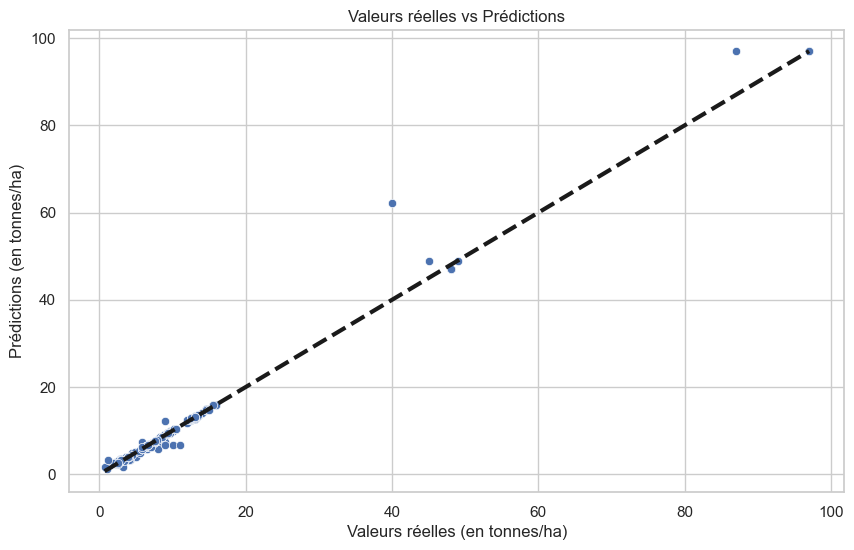

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prédictions
y_pred = regressor.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # ligne idéale
plt.xlabel('Valeurs réelles (en tonnes/ha)')
plt.ylabel('Prédictions (en tonnes/ha)')
plt.title('Valeurs réelles vs Prédictions')
plt.show()


### Distribution des résidus

Le code suivant va calculer les résidus de la prédiction du modèle de régression et les visualiser à l'aide d'un histogramme pour analyser leur distribution. Les résidus mesurent l'erreur verticale entre chaque point de donnée réel et sa prédiction correspondante, indiquant combien le modèle s'est trompé pour chaque prédiction.

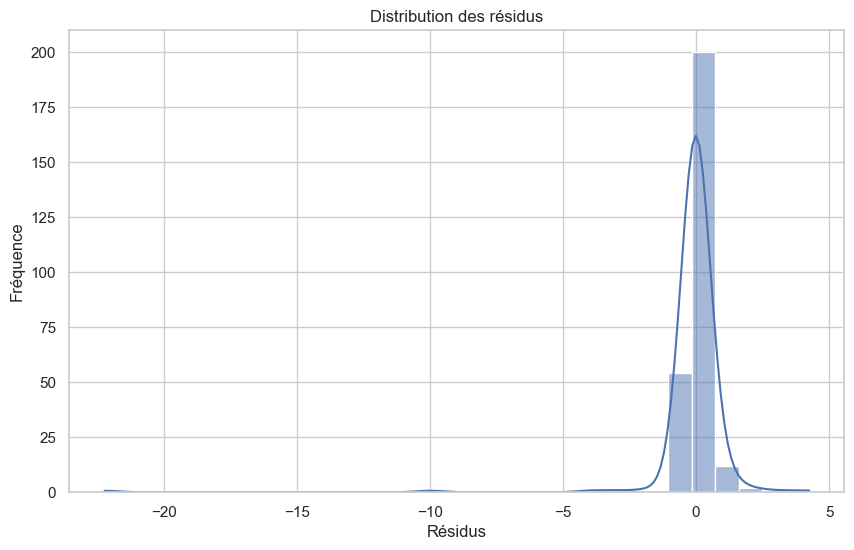

In [99]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des résidus')
plt.show()

Les résidus suivent une distribution approximativement normale (symétrique et centrée autour de zéro). Les déviations par rapport à ce schéma peuvent indiquer des problèmes comme des points aberrants, ou que le modèle n'a pas capturé certaines informations pertinentes, qui pourraient être corrigés avec des ajustements ou une sélection de modèle différente.

### Feature importance

Le code suivant va générer un graphique illustrant l'importance des caractéristiques (features) utilisées dans le modèle.  
A noter que le OneHotEncoder transforme les variables catégorielles en variables indicatrices (ou dummies), changeant ainsi leurs noms. Par exemple, une variable catégorielle "crop" avec des valeurs "corn" et "wheat" serait transformée en deux colonnes "crop_corn" et "crop_wheat".

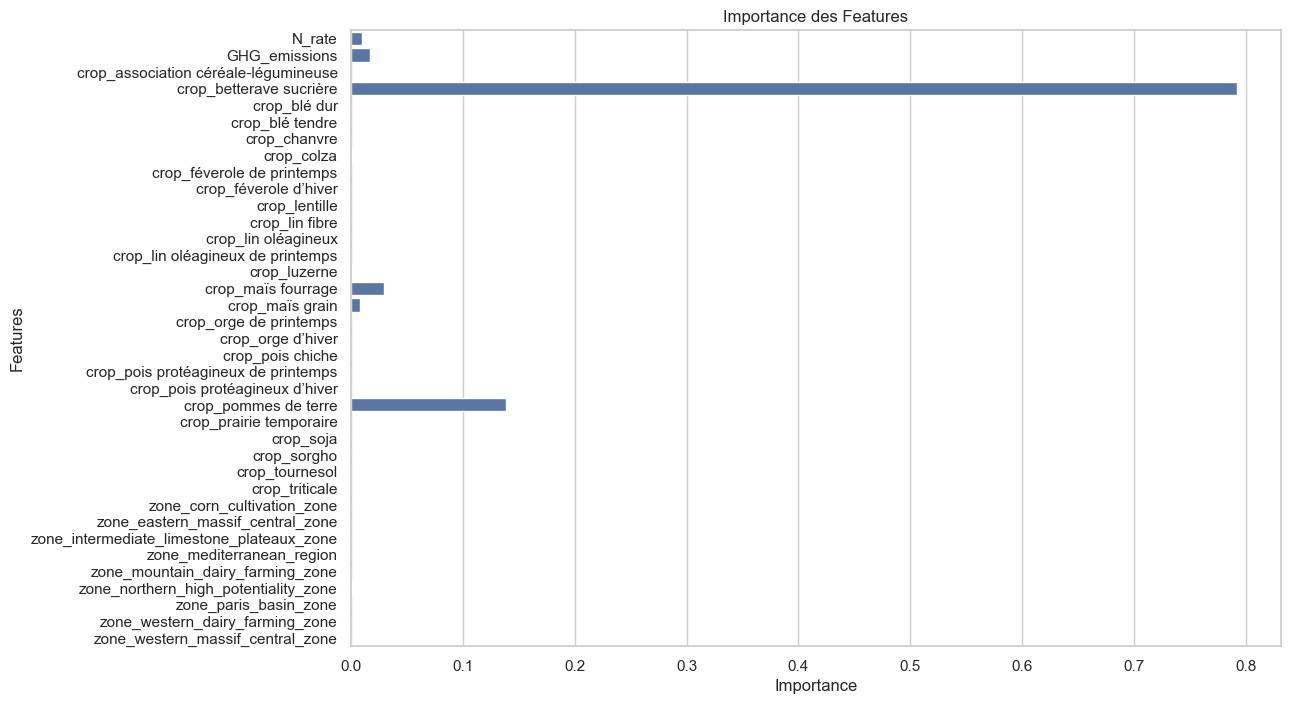

In [ ]:
import numpy as np

feature_importances = regressor.named_steps['regressor'].feature_importances_

# noms des features après la transformation (OneHotEncoder peut changer les noms)
columns = (regressor.named_steps['preprocessor']
           .transformers_[1][1]
           .get_feature_names_out(input_features=categorical_features))
columns = np.concatenate([numeric_features, columns])

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Importance des Features')
plt.show()


Des caractéristiques avec une importance élevée sont celles que le modèle a trouvé les plus utiles pour effectuer des prédictions précises, tandis que des caractéristiques avec une faible importance pourraient ne pas être très utiles et pourraient potentiellement être omises lors de l'optimisation du modèle.  
Dans le diagramme, la variable crop_betterave sucrière est de loin la plus importante. N_rate et GHG_emissions sont dans les 5 variables les plus importantes, mais loin derrière.

## Traitement du langage naturel

### Dataset des opérations de chantier

In [108]:
operation_parameters = load_data(file_paths['operation_parameters'])

In [109]:
operation_parameters.shape

(25, 10)

In [110]:
print(operation_parameters.columns)

Index(['ï»¿operation', 'description', 'fixed_cost', 'cost_fuel_incl',
       'cost_labour_incl', 'cost_fuel_and_labour_incl', 'ha_h', 'h_ha',
       'fuel_cons', 'energy_cost'],
      dtype='object')


In [111]:
operation_parameters['description'] = operation_parameters['description'].astype(str)

### Nettoyage des descriptions

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# nettoyage du texte
def clean_text(text):
    tokens = word_tokenize(text.lower())  # Tokenisation et normalisation en minuscule
    tokens = [word for word in tokens if word.isalpha()]  # Garder uniquement les mots alphabétiques
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Suppression des stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatisation
    return ' '.join(tokens)

# Appliquer la fonction de nettoyage
operation_parameters['cleaned_description'] = operation_parameters['description'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julienbremeersch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julienbremeersch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/julienbremeersch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
from collections import Counter

# Combiner tous les textes nettoyés dans une grande chaîne
all_text = ' '.join(operation_parameters['cleaned_description'].tolist())

# Calculer la fréquence des mots
word_freq = Counter(all_text.split())
word_freq.most_common(20)  # Afficher les 20 mots les plus communs

[('harvester', 5),
 ('seeder', 3),
 ('potato', 3),
 ('weeder', 3),
 ('tractor', 3),
 ('trailer', 3),
 ('operation', 2),
 ('cereal', 2),
 ('precision', 2),
 ('sugar', 2),
 ('beet', 2),
 ('sprayer', 2),
 ('spreader', 2),
 ('two', 2),
 ('silage', 2),
 ('hay', 2),
 ('plow', 1),
 ('planter', 1),
 ('harrow', 1),
 ('hoe', 1)]

### Nuage de mots

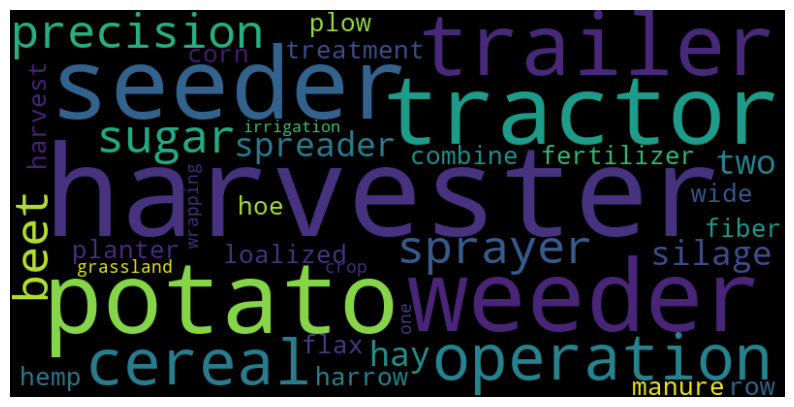

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
